# Sentiment Analysis - IMDB Review (NLP, Deep Learning)

##### Import Necessary Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

#import warning
import warnings
warnings.filterwarnings('ignore')

##### Import Dataset

In [2]:
dataset = pd.read_csv('./Dataset/IMDB-Review/IMDB-Dataset.csv') 

##### Dataset Checking

In [3]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


##### Exploratory Data Analysis

In [4]:
#simple EDA
def simple_eda(df):
    print("summary")
    print("------------------------------")
    print(df.describe())
    print("------------------------------")
    print("columns types")
    print(df.dtypes)
    print("------------------------------")
    print("missing values")
    print(df.isna().sum())
    print("------------------------------")
    print("duplicated values")
    print(df.duplicated().any())
    print("------------------------------")
    print("shape")
    print(df.shape)

In [5]:
simple_eda(dataset)

summary
------------------------------
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  negative
freq                                                    5     25000
------------------------------
columns types
review       object
sentiment    object
dtype: object
------------------------------
missing values
review       0
sentiment    0
dtype: int64
------------------------------
duplicated values
True
------------------------------
shape
(50000, 2)


##### Sentiment Countplot

Text(0.5, 1.0, 'Sentiment column countplot')

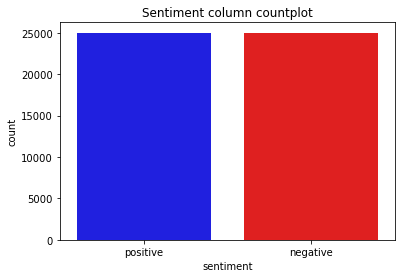

In [6]:
sns.countplot(dataset['sentiment'],
             palette=["blue","red"])
plt.title("Sentiment column countplot")

##### Review Length Histogram

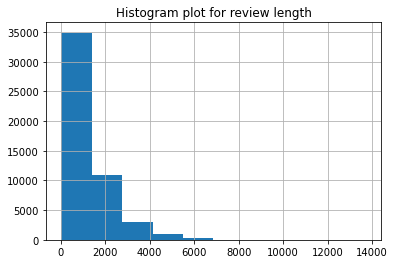

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
dtype: float64


In [7]:
review_length = [len(i) for i in dataset['review']]
review_length = pd.Series(review_length)
review_length.hist()
plt.title("Histogram plot for review length")
plt.show()

print(review_length.describe())

##### Changing positive values to 1 and negative to 0

In [8]:
dataset['sentiment'] = [ 1 if each == "positive" else 0 for each in dataset['sentiment']]
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


##### Generating ineffective words

In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_eng = set(stopwords.words("english"))
stop_eng

[nltk_data] Downloading package stopwords to C:\Users\Arkaan
[nltk_data]     Ah'naf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

##### Manipulating Review Column

In [10]:
import regex as re
#remove non alphabets
dataset['review'] = dataset['review'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))

#remove punctuations
dataset['review'] = dataset['review'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))

#remove html tag (<.....>)
dataset['review'] = dataset['review'].apply(lambda x: re.sub('<.*?>', ' ', x))
dataset['review'] = dataset['review'].apply(lambda x: re.sub('br', ' ', x))

#lower case
dataset['review'] = dataset['review'].apply(lambda x: x.lower())

#remove stop words
dataset['review'] = dataset['review'].apply(lambda x : [i for i in x.split() if i not in stop_eng])

In [11]:
dataset

,review,sentiment
0,"[one, reviewers, mentioned, watching, oz, epis...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, family, little, boy, jake, thinks,...",0
4,"[petter, mattei, love, time, money, visually, ...",1
...,...,...
49995,"[thought, movie, right, good, job, creative, o...",1
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",0
49997,"[catholic, taught, parochial, elementary, scho...",0
49998,"[going, disagree, previous, comment, side, mal...",0


##### Data Splitting

In [12]:
X = dataset['review']
y = dataset['sentiment']

In [13]:
#splitting data using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((40000,), (10000,), (40000,), (10000,))

##### Tokenize

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

token = Tokenizer(lower = False,
                 num_words = 20000)
token.fit_on_texts(X_train)
token.word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'bad': 14,
 'get': 15,
 'people': 16,
 'great': 17,
 'also': 18,
 'first': 19,
 'made': 20,
 'make': 21,
 'could': 22,
 'way': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'watch': 27,
 'character': 28,
 'films': 29,
 'seen': 30,
 'two': 31,
 'many': 32,
 'plot': 33,
 'never': 34,
 'life': 35,
 'love': 36,
 'acting': 37,
 'best': 38,
 'know': 39,
 'show': 40,
 'little': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'scene': 46,
 'still': 47,
 'say': 48,
 'scenes': 49,
 'something': 50,
 'go': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'thing': 55,
 'actors': 56,
 'though': 57,
 'years': 58,
 'director': 59,
 'funny': 60,
 'old': 61,
 'another': 62,
 'actually': 63,
 'work': 64,
 'makes': 65,
 'nothing': 66,
 'look': 67,
 'going': 68,
 'find': 69,
 'lot': 70,
 'new': 71,
 'every': 72,
 'part': 73,
 'wo

##### Transforms each text in texts to a sequence of integers.

In [15]:
X_train = token.texts_to_sequences(X_train)
X_val = token.texts_to_sequences(X_val)

X_train

[[659,
  2001,
  32,
  1740,
  1868,
  4156,
  6280,
  654,
  4660,
  119,
  5964,
  18,
  637,
  25,
  3,
  1843,
  26,
  41,
  972,
  2201,
  1034,
  331,
  418,
  764,
  281,
  59,
  2808,
  4193,
  2771,
  114,
  13,
  44,
  2971,
  126,
  309,
  96,
  4762,
  10,
  3,
  14238,
  14,
  245,
  2,
  96,
  191,
  1696,
  9860,
  38,
  295,
  1527,
  11008,
  301,
  260,
  39,
  37,
  248,
  11616,
  6619,
  244,
  12037,
  1014,
  340,
  110,
  864,
  3998,
  75,
  315,
  561,
  483,
  128,
  34,
  701,
  112,
  304,
  247,
  6,
  3567,
  164,
  10008,
  62,
  1548,
  87,
  11402,
  11206,
  587,
  1780,
  1049,
  2712,
  11207,
  3498,
  1815,
  121,
  100,
  207,
  922,
  2664,
  8486,
  8973,
  3848,
  1,
  848,
  16503,
  365,
  349,
  2444,
  136,
  15,
  32,
  32,
  554,
  9717,
  12512,
  1207,
  120,
  4194,
  17445,
  102,
  992,
  4215,
  5093,
  2155,
  321,
  486,
  579,
  2790,
  1121,
  16077,
  3441,
  59,
  1353,
  1085,
  1462,
  735,
  1097,
  185,
  2730,
  288,
  4

##### Padding Sequences

In [16]:
def get_max_length():
    review_length = []
    for review in X_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train,
                        maxlen=get_max_length(),
                       padding='post',
                       truncating='post')
X_val = pad_sequences(X_val, 
                      maxlen=get_max_length(),
                       padding='post',
                       truncating='post')

In [18]:
X_train

array([[  659,  2001,    32, ...,  9717, 12512,  1207],
       [   27,   317,     1, ...,   185,  1137,   143],
       [ 1182,    36,     9, ...,     0,     0,     0],
       ...,
       [  649,     3,   260, ...,     0,     0,     0],
       [  235,    78,   707, ...,     0,     0,     0],
       [  402,     1,   144, ...,     0,     0,     0]])

In [19]:
X_val

array([[  10,  300,  552, ...,    0,    0,    0],
       [  32,  558,  158, ..., 2409, 7463,   72],
       [   2,  773,  111, ...,    0,    0,    0],
       ...,
       [ 303,  555,   11, ...,    0,    0,    0],
       [ 116,   29,   51, ...,    0,    0,    0],
       [ 105, 7923,   58, ...,    0,    0,    0]])

In [20]:
print(X_train.shape) #max_tokens
max_tokens = X_train.shape[1]
max_tokens

(40000, 113)


113

In [21]:
#define total_words
total_words = len(token.word_index) + 1
total_words

90656

##### Model Building

In [22]:
#importing necessary packages for model building
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [57]:
#model build
model = Sequential()
model.add(Embedding(total_words, 50, input_length = get_max_length()))
model.add(LSTM(16, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(8, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(4))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

#compile
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(lr = 0.0001), 
              metrics=['accuracy'])

#model summary
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 113, 50)           4532800   
                                                                 
 lstm_24 (LSTM)              (None, 113, 16)           4288      
                                                                 
 dropout_24 (Dropout)        (None, 113, 16)           0         
                                                                 
 lstm_25 (LSTM)              (None, 113, 8)            800       
                                                                 
 dropout_25 (Dropout)        (None, 113, 8)            0         
                                                                 
 lstm_26 (LSTM)              (None, 4)                 208       
                                                                 
 dropout_26 (Dropout)        (None, 4)                

##### Model Fitting

In [58]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es_loss = EarlyStopping(monitor='val_loss', 
                        mode='min', 
                        verbose=1, 
                        patience=1)

mc = ModelCheckpoint('best_model.h5', 
                     monitor='val_loss', 
                     mode='min', 
                     save_best_only=True)

In [59]:
history = model.fit(X_train, 
          y_train, 
          batch_size = 128, 
          validation_split = 0.2,
          epochs = 30, 
          callbacks=[es_loss, mc])

Epoch 1/30
250/250 [==============================] - 41s 149ms/step - loss: 0.6910 - accuracy: 0.5428 - val_loss: 0.6839 - val_accuracy: 0.6116
Epoch 2/30
250/250 [==============================] - 36s 143ms/step - loss: 0.5480 - accuracy: 0.7869 - val_loss: 0.4485 - val_accuracy: 0.8413
Epoch 3/30
250/250 [==============================] - 36s 143ms/step - loss: 0.4011 - accuracy: 0.8810 - val_loss: 0.4132 - val_accuracy: 0.8495
Epoch 4/30
250/250 [==============================] - 36s 143ms/step - loss: 0.3533 - accuracy: 0.9000 - val_loss: 0.3968 - val_accuracy: 0.8566
Epoch 5/30
250/250 [==============================] - 36s 144ms/step - loss: 0.3310 - accuracy: 0.9071 - val_loss: 0.3843 - val_accuracy: 0.8608
Epoch 6/30
250/250 [==============================] - 36s 144ms/step - loss: 0.2998 - accuracy: 0.9205 - val_loss: 0.3838 - val_accuracy: 0.8609
Epoch 7/30
250/250 [==============================] - 36s 144ms/step - loss: 0.2815 - accuracy: 0.9281 - val_loss: 0.3844 - val_ac

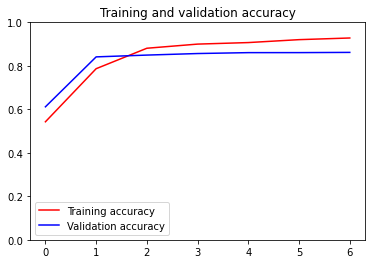

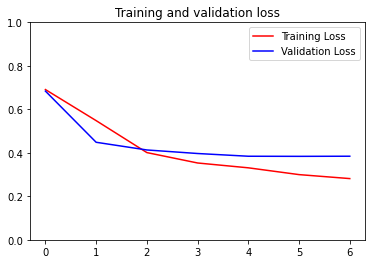

In [60]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylim([0,1])
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.ylim([0,1])
plt.legend()
plt.show()

##### Model Save

In [83]:
model.save('imdb_model.h5')